In [76]:
import pandas as pd

In [77]:
df = pd.read_csv("dados_concreto - Sheet1.csv")

In [78]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


In [79]:
df.shape

(2029, 10)

In [80]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28.0,66.90,Alto
386,528.0,0.0,0.0,185.0,6.9,920.0,720.0,28.0,56.83,Baixa
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28.0,36.80,Baixa
1797,847.0,0.0,0.0,279.0,0.0,1545.6,1602.3,33.6,31.40,Baixa
89,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3.0,39.30,Baixa


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [82]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2020.000000
mean,415.147610,107.776688,78.604091,264.240315,9.045293,1444.538492,1139.313258,67.255643,35.886683
std,237.133806,145.230234,106.149019,111.056771,10.239884,604.194394,481.913282,103.260526,16.860121
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.100000
25%,250.000000,0.000000,0.000000,182.000000,0.000000,967.100000,776.400000,14.000000,23.500000
50%,350.400000,26.000000,0.000000,206.000000,7.800000,1104.000000,889.000000,28.000000,34.675000
75%,512.400000,187.000000,136.200000,345.800000,13.600000,1911.800000,1502.800000,75.600000,46.230000
max,1487.600000,923.700000,500.900000,639.900000,83.700000,3150.000000,2779.300000,1022.000000,87.200000


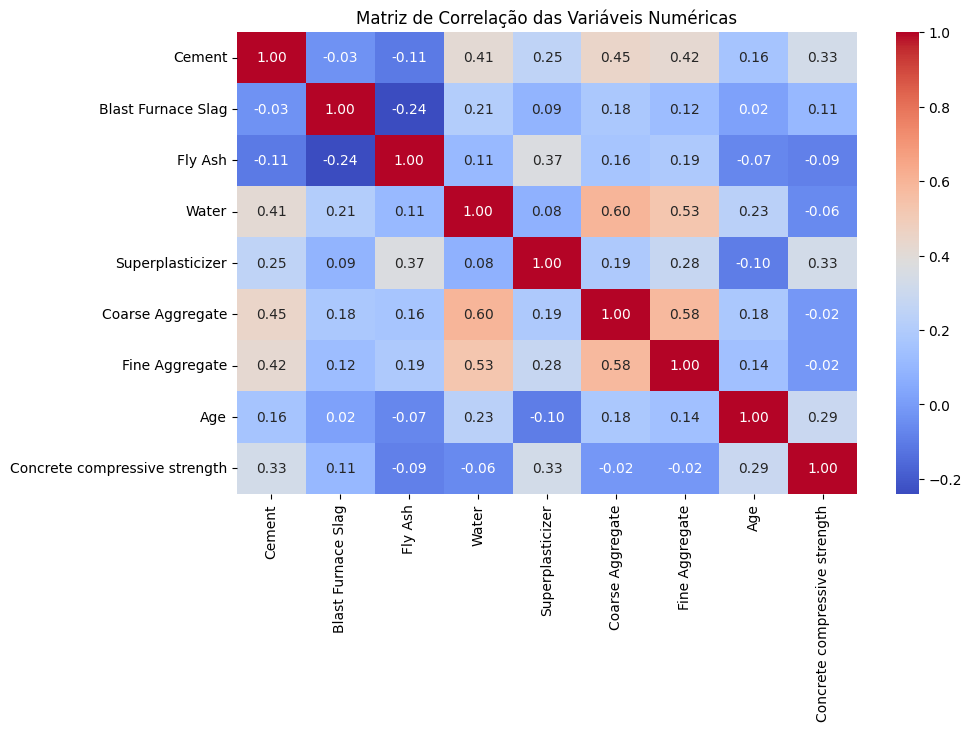

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = df.select_dtypes(include=['float64', 'int64'])

corr = numericas.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

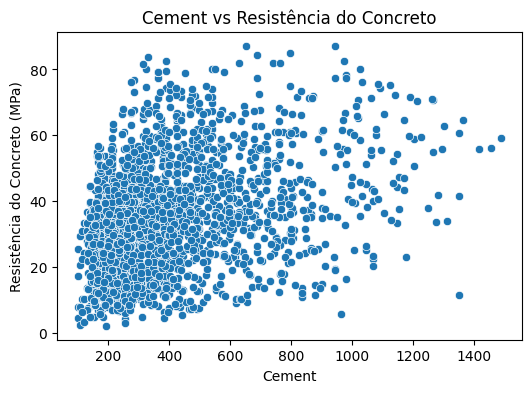

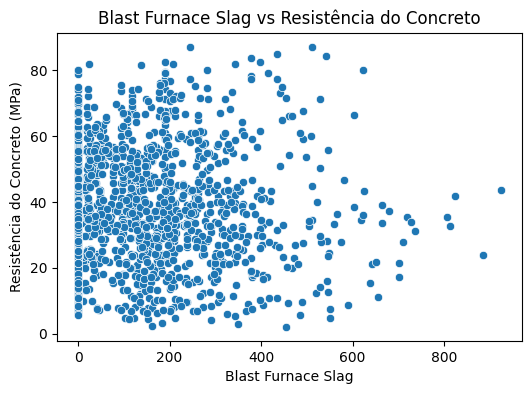

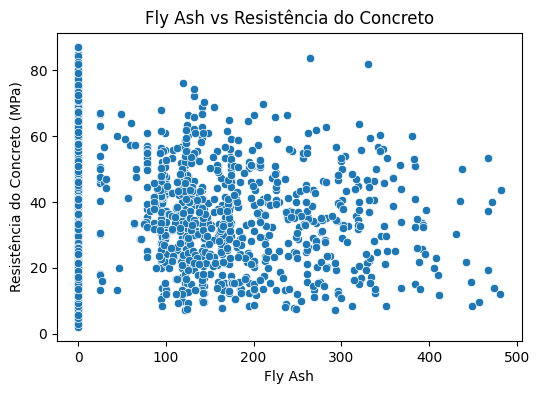

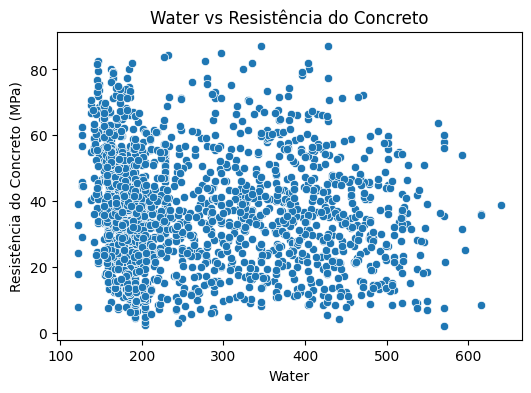

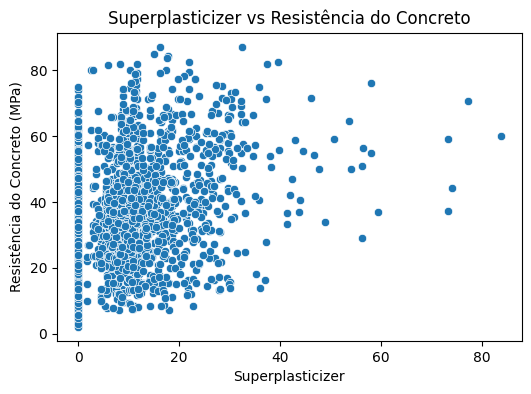

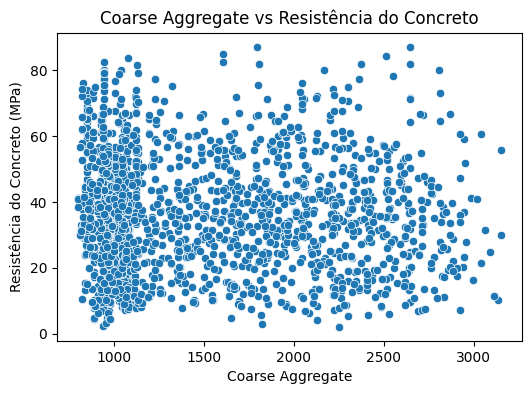

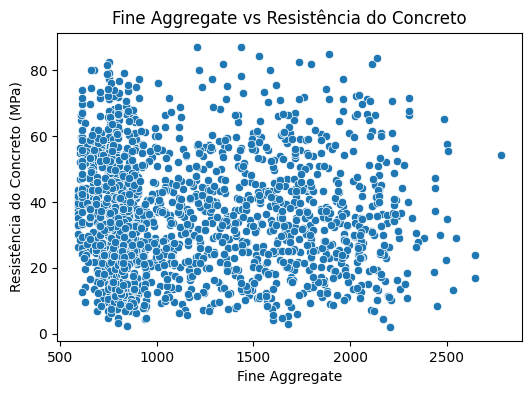

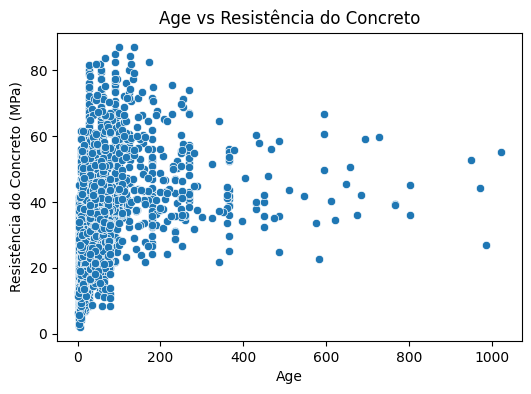

In [84]:
variaveis = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
             'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['Concrete compressive strength'])
    plt.title(f"{var} vs Resistência do Concreto")
    plt.xlabel(var)
    plt.ylabel("Resistência do Concreto (MPa)")
    plt.show()

In [85]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,9
Strength Category,0


In [86]:
df = df.dropna(axis=0, how='any')

In [87]:
df.duplicated().sum()

np.int64(25)

In [88]:
df = df.drop_duplicates()

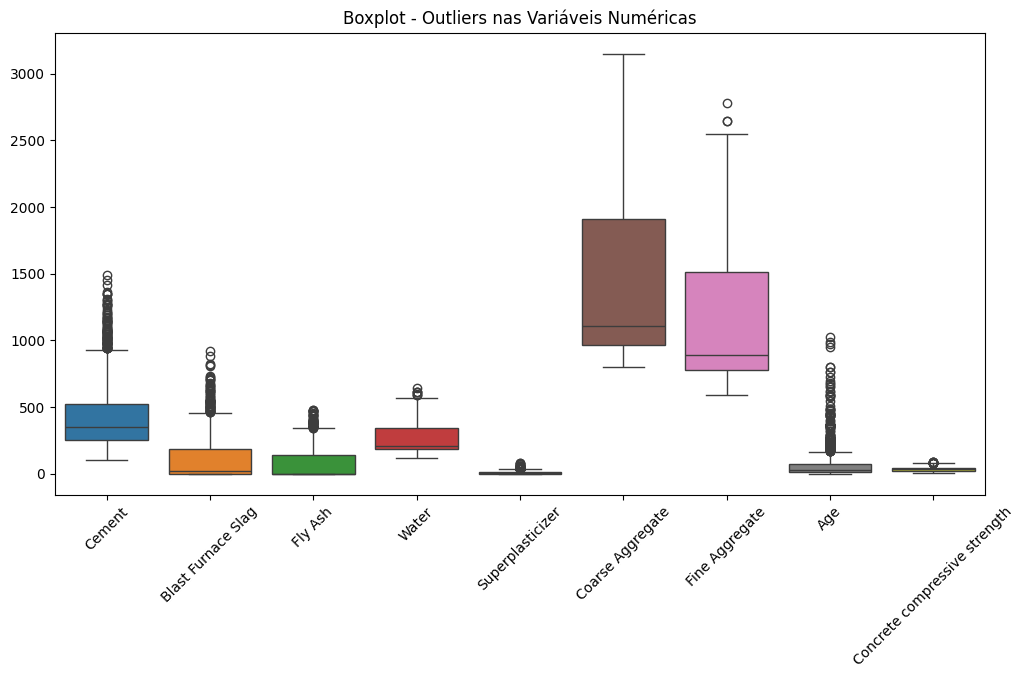

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Boxplot - Outliers nas Variáveis Numéricas")
plt.show()

In [90]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

print("DataFrame sem outliers:", df.shape)

DataFrame sem outliers: (1533, 10)


In [91]:
df = pd.get_dummies(df, columns=['Strength Category'], drop_first=True)

In [93]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category_Baixa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,False
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03,True
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45,True
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,True
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29,True
